In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Задание 1

In [4]:
def gauss_2(a, b):
   r"""Return nodes and weights for a two-point Gauss quadrature on [a, b].
   
   Parameters
   ----------
   a, b : float
      Boundaries of the integration interval
      
   Returns
   -------
   x1, x2, w1, w2 : float
      Nodes and weights of the quadrature.
   """
   x1 = (a + b) / 2 - (b - a) / 2 / np.sqrt(3)
   x2 = (a + b) / 2 + (b - a) / 2 / np.sqrt(3)

   w1 = w2 = (b - a) / 2
   return x1, x2, w1, w2

In [15]:
from numpy.testing import assert_allclose

x1, x2, w1, w2 = gauss_2(0, 1)

def f(x, n): 
    return x**n


for n in [0, 1, 2, 3]:
    assert_allclose(w1*f(x1, n=n) + w2*f(x2, n=n),
                    1./(n+1), atol=1e-14)

## Задание 2

\begin{equation}
    I = \int\limits_0^1 \dfrac{e^x}{\sqrt{x(1-x)}}
\end{equation}

\begin{equation}
    I = \int\limits_0^1 \dfrac{e^x - 1 + x - e - (x-1) \cdot e}{\sqrt{x(1-x)}} +  \int\limits_0^1 \dfrac{1}{\sqrt{x(1-x)}} + \int\limits_0^1 \dfrac{(e - 1)\cdot x}{\sqrt{x(1-x)}} =
     \int\limits_0^1 \dfrac{e^x - 1 + x - e \cdot x}{\sqrt{x(1-x)}} + \pi + (e - 1)\cdot \pi /2
\end{equation}



In [6]:
def f1(x):
    res = (np.exp(x) - 1 + x - x * np.e)/np.sqrt(x * (1-x))
    return res


def integ(f, a, b, npts=100000):
    """Compute the value of the integral above.
    
    Subtract the singularities and use the trapezoid rule. 
    
    Parameters
    ----------
    npts : int
        The number of points for the trapezoid rule
        
    Returns
    -------
    I : float
       The computed value of the integral
    """ 
    x = np.linspace(a, b, npts, endpoint=True)
    res = np.sum((x[1:] - x[:-1]) * (f(x[1:]) + f(x[:-1])) / 2)
    return res


In [7]:
# wolfram alpha gives 5.50842977
print(integ(f1, 1e-16, 1 - 1e-16) + np.pi + (np.e - 1)*np.pi/2)


5.508429785182273


## Задание 4

In [8]:
def f2(x):
    return 1/(np.sqrt(np.abs(x)*(1-x)))

d = np.array([i for i in np.linspace(1e-7, 1e-1, 1000)])
ints = []
for i in d:
    ints.append(integ(f2, -0.5, 0 - i) + integ(f2, 0 + i, 0.5))

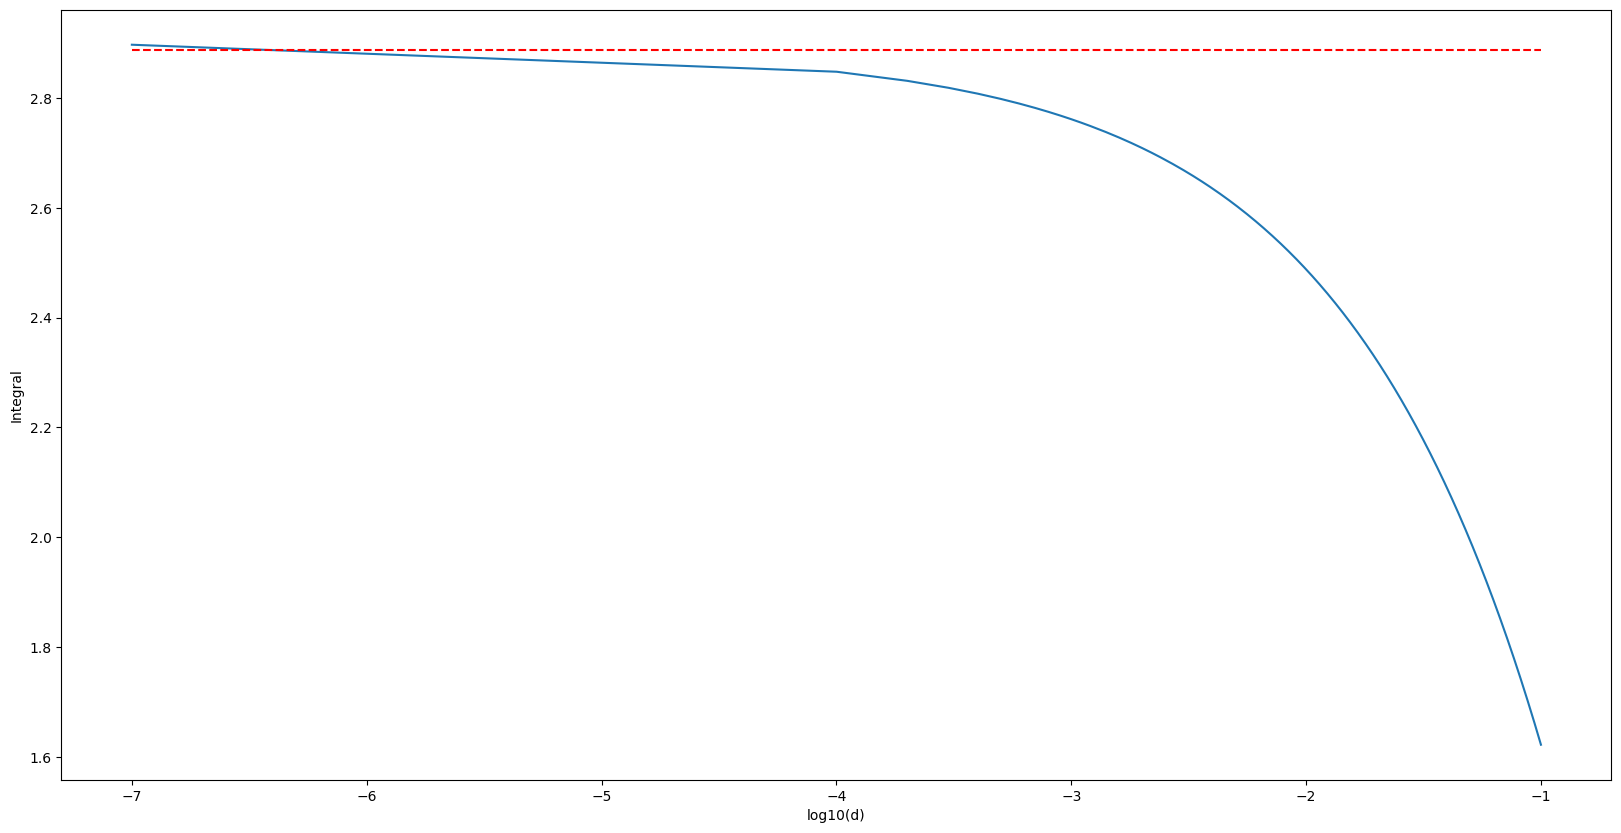

In [9]:
plt.figure(figsize=(20, 10))
plt.plot(np.log10(d), ints)
plt.hlines(2.88775, np.min(np.log10(d)), np.max(np.log10(d)), colors='r', linestyles='dashed')
plt.xlabel("log10(d)")
plt.ylabel("Integral")
plt.show()

In [10]:
print(integ(f2, -0.5, 0 - 1*10**(-6.5)) + integ(f2, 0 + 1e-6, 0.5))

2.887444071696935


## задание 5

In [11]:
def f3(k, x):
    return np.e**(-x) * np.sin(k*x)

def analytic_integral(k):
    return k/(1 + k**2) - np.exp(-1 * np.pi)*(np.sin(k*np.pi) + k * np.cos(k * np.pi))/(1 + k**2)

In [ ]:
def integ_simpson(f, a, b, npts=100000):
    x = np.linspace(a, b, npts, endpoint=True)
    res = np.sum((x[1:] - x[:-1]) * (f(x[1:])/6 + f(x[:-1])/6 + 2 * f((x[1:]+x[:-1]) / 2) / 3))
    return res

In [13]:
simps_diff = []

for k in range(1, 1000):    
    simps_diff.append( integ_simpson(lambda x: f3(k, x), 0, np.pi) - analytic_integral(k))

print(max(simps_diff))

3.518134134711248e-13


In [14]:
from scipy.interpolate import lagrange

poly = lagrange(np.linspace(0, np.pi, 3, endpoint=True), np.exp(-1 * np.linspace(0, np.pi, 3, endpoint=True)))

simps_diff_inter = []

for k in range(1, 1000):    
    simps_diff.append( integ_simpson(lambda x: poly(x) * np.sin(k*x), 0, np.pi) - analytic_integral(k))

print(max(simps_diff))

0.09567860817362245
